## Ressource used: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
Link : https://github.com/CSSEGISandData/COVID-19

## load data: 
   ### 1) covid cases confirmed
   ### 2) covid deaths

In [29]:
%%bash

curl -o ../01_data/covid_time_series_cases.csv "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
curl -o ../01_data/covid_time_series_deaths.csv "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  155k  100  155k    0     0   603k      0 --:--:-- --:--:-- --:--:--  605k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112k  100  112k    0     0   585k      0 --:--:-- --:--:-- --:--:--  586k


In [2]:
import pandas as pd


In [3]:
file_cases = "../01_data/covid_time_series_cases.csv"
file_deaths = "../01_data/covid_time_series_deaths.csv"


data_cases = pd.read_csv(file_cases)
data_deaths = pd.read_csv(file_deaths)

In [4]:
data_cases.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
6/25/20             int64
6/26/20             int64
6/27/20             int64
6/28/20             int64
6/29/20             int64
Length: 164, dtype: object

In [6]:
data_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 164 entries, Province/State to 6/29/20
dtypes: float64(2), int64(160), object(2)
memory usage: 340.9+ KB


In [7]:
data_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,176,183,186,189,197,212,212,259,267,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,698,698,702,707,710,711,712,713,713,713
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,922,941,967,992,1015,1076,1089,1103,1118,1128
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,247,247,247,265,265,272,272,272,272,272
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900


In [10]:
data_cases["Country/Region"].value_counts().count()

188

In [9]:
data_cases["Country/Region"].value_counts()

China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Nigeria            1
Hungary            1
Guinea             1
Costa Rica         1
Afghanistan        1
Name: Country/Region, Length: 188, dtype: int64

In [12]:
data_cases.isnull().sum().sum()

185

In [13]:
data_cases.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/25/20             0
6/26/20             0
6/27/20             0
6/28/20             0
6/29/20             0
Length: 164, dtype: int64

In [14]:
data_cases["Province/State"].value_counts().count()

81

## selecting data (germany)

In [15]:
def select_transform_ts(data, region, col_name):
    
    # select region
    data_region = data[data["Country/Region"] == region].copy()
    
    # cut first columns with location information and put time series in row-wise sequence 
    ts_data_region = data_region.transpose().iloc[4:]
    
    # set date type for index
    ts_data_region.index = pd.to_datetime(ts_data_region.index)
    
    # set col name
    ts_data_region.columns = [col_name]
    
    return ts_data_region

In [16]:
ts_cases_ger = select_transform_ts(data_cases, "Germany", "cases_confirmed")
ts_deaths_ger = select_transform_ts(data_deaths, "Germany", "deaths")

In [17]:
ts_cases_ger

,cases_confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-06-25,193371
2020-06-26,194036
2020-06-27,194458
2020-06-28,194693


## write files 

In [30]:
filename_cases_transformed = "../01_data/covid_time_series_cases_transformed.csv"
filename_deaths_transformed = "../01_data/covid_time_series_deaths_transformed.csv"


ts_deaths_ger.to_csv(filename_deaths_transformed)
ts_cases_ger.to_csv(filename_cases_transformed)

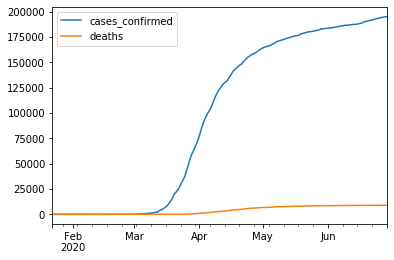

In [25]:
ax = ts_cases_ger.plot()
ts_deaths_ger.plot(ax=ax)

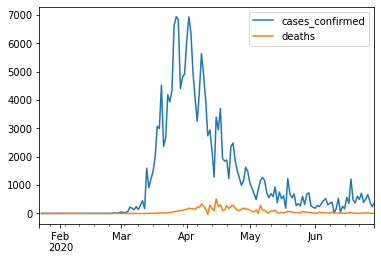

In [19]:
ax = ts_cases_ger.diff().plot()
ts_deaths_ger.diff().plot(ax=ax)

In [20]:
ts_death_ger_norm = (ts_deaths_ger - ts_deaths_ger.min()) / (ts_deaths_ger.max() - ts_deaths_ger.min())
ts_cases_ger_norm = (ts_cases_ger - ts_cases_ger.min()) / (ts_cases_ger.max() - ts_cases_ger.min())

## is there any correlations between cases and deaths?

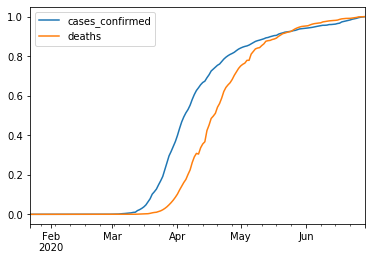

In [21]:
ax = ts_cases_ger_norm.plot()
ts_death_ger_norm.plot(ax=ax)

## curves shows similiar progress with a little delay (2 weeks?) 

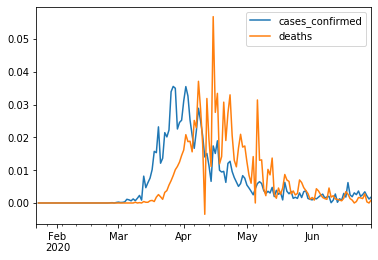

In [22]:
ax = ts_cases_ger_norm.diff().plot()
ts_death_ger_norm.diff().plot(ax=ax)